### K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

In [28]:
ss = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ss.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
ss = ss.loc[ss['DISTRICT']!='TOTAL']
ss = ss.loc[ss['DISTRICT']!='DELHI UT TOTAL']
ss.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244


In [3]:
ss.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
count,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000,8597.000000
mean,2006.635338,46.823659,40.941840,27.816331,41.509480,6.910434,28.878330,407.180412,392.215424
std,3.464064,42.755817,50.589877,30.897866,56.062152,10.945607,50.937364,778.770851,559.583270
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.000000,10.000000,8.000000,9.000000,1.000000,6.000000,86.000000,40.000000
50%,2007.000000,37.000000,27.000000,19.000000,24.000000,3.000000,16.000000,206.000000,191.000000
75%,2010.000000,63.000000,54.000000,39.000000,52.000000,9.000000,34.000000,430.000000,490.000000
max,2012.000000,542.000000,741.000000,568.000000,587.000000,219.000000,1131.000000,13195.000000,4837.000000


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["STATE/UT"]=le.fit_transform(ss["STATE/UT"].astype("str"))
ss["STATE/UT"].value_counts()

32    866
19    616
20    540
4     528
30    457
28    442
25    418
16    387
11    372
1     358
3     350
14    310
27    302
15    300
34    297
12    256
6     254
17    221
2     183
9     171
13    164
33    156
24    126
21    113
23     96
22     84
31     55
29     48
10     24
8      24
0      24
26     19
18     12
5      12
7      12
Name: STATE/UT, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss["DISTRICT"]=le.fit_transform(ss["DISTRICT"].astype("str"))
ss["DISTRICT"].value_counts()

239    46
705    37
546    37
799    36
603    35
       ..
506     1
685     1
2       1
408     1
83      1
Name: DISTRICT, Length: 806, dtype: int64

In [6]:
ss.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,1,3,2001,101,60,50,46,9,41,199,1131
1,1,28,2001,151,125,23,53,8,16,366,1543
2,1,154,2001,101,57,27,59,4,14,723,2088
3,1,172,2001,80,53,20,25,1,4,173,795
4,1,219,2001,82,67,23,49,4,25,1021,1244


In [31]:
from sklearn import preprocessing
ss = preprocessing.scale(ss)
#print(crime_rates_standardized)
ss = pd.DataFrame(ss)

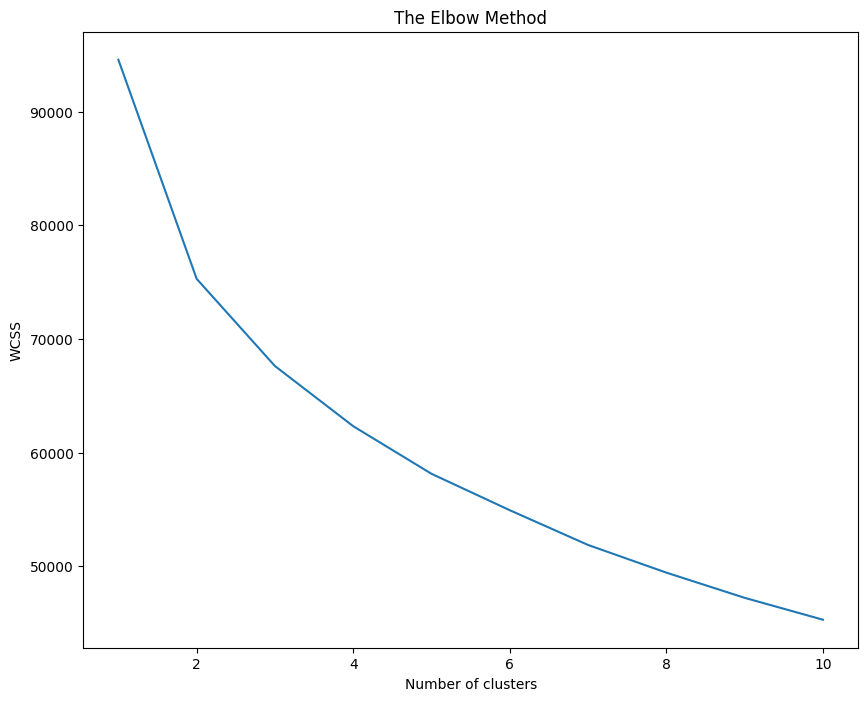

In [8]:
103
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [90]:
wcss

[94566.99999999974,
 75284.61185651553,
 67611.35081399378,
 62317.12570734403,
 58128.31301310371,
 54923.626907632,
 51865.852612726296,
 49431.8196135735,
 47214.64285781722,
 45287.75174539989]

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(ss)
y_kmeans

array([2, 2, 2, ..., 1, 1, 1])

In [191]:
import pickle

pickle.dump(kmeans,open('kmean.pkl','wb'))
rap = pickle.load(open('kmean.pkl','rb'))

In [33]:
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
ss['cluster'] = cluster

In [34]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
df.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
df = df.loc[df['DISTRICT']!='TOTAL']
df = df.loc[df['DISTRICT']!='DELHI UT TOTAL']
df['cluster'] = cluster

In [35]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
cluster,,,,,,,,,
1,2008.0,158.9,160.1,96.8,232.6,26.0,212.9,3463.7,1391.2
2,2006.6,27.7,22.7,16.6,21.9,3.6,14.5,211.0,215.9
3,2006.6,84.0,75.3,49.4,72.6,13.3,47.5,610.4,738.3


In [48]:
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [49]:
rap = pickle.load(open('kmean.pkl','rb'))

In [111]:
df.loc[df['cluster']==1].loc[df['YEAR']==2012]

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
8210,ANDHRA PRADESH,CYBERABAD,2012,198,113,75,158,14,86,4461,4013,1
8215,ANDHRA PRADESH,HYDERABAD CITY,2012,102,166,74,88,12,57,3694,3381,1
8272,ASSAM,GUWAHATI CITY,2012,83,6,78,341,14,275,2426,320,1
8283,ASSAM,NAGAON,2012,74,86,173,351,39,93,540,828,1
8315,BIHAR,MOTIHARI,2012,124,735,22,233,27,46,553,1468,1
8317,BIHAR,MUZAFFARPUR,2012,198,611,34,279,48,73,1469,2219,1
8322,BIHAR,PATNA,2012,356,86,49,376,38,119,3114,4157,1
8368,GUJARAT,AHMEDABAD COMMR.,2012,90,49,63,229,24,603,3622,1320,1
8502,KARNATAKA,BANGALORE COMMR.,2012,266,454,90,532,37,670,9826,3095,1
8565,MADHYA PRADESH,BHOPAL,2012,78,96,143,63,2,200,2605,1361,1


In [78]:
features = [-0.168323,	-0.076598,	-0.011382,	0.869067,	0.679756,	0.699329,	0.554353,	0.581336,	0.366191,	0.260949,	0.618543]
final_features = [np.array(features)]
y_pred = kmeans.predict(final_features)
if y_pred[0] == 0:         
    label="High Crime Rate Area"
elif y_pred[0] == 1:
    label="Low Crime Rate Area"
elif y_pred[0] == 2:
    label = "Moderate Crime Rate Area"
print(label)

Moderate Crime Rate Area


### Plotting K-Means Clusters :

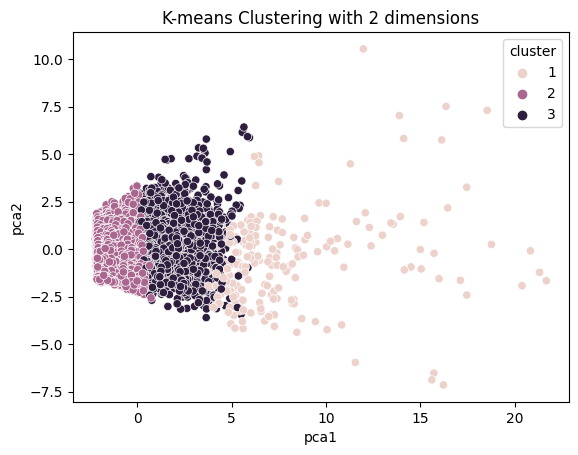

In [36]:
from sklearn.decomposition import PCA
import seaborn as sns

reduced_data = PCA(n_components=2).fit_transform(ss)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=ss['cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [37]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# load your 11-column dataframe here
#df = pd.read_csv("your_data.csv")

# initialize PCA model with 2 components
pca = PCA(n_components=2)

# fit and transform the data to 2 dimensions
principal_components = pca.fit_transform(ss)

# create a new dataframe with the reduced dimensions
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# add a new column to the dataframe with the cluster labels
# replace 'cluster_labels' with the actual column name that contains your cluster labels
df_pca['cluster'] = ss['cluster']

# plot the scatter plot with plotly
fig = px.scatter(df_pca, x="PC1", y="PC2", color="cluster")
fig.show()


### Moderate and high crime clusters on folium :

In [53]:
'''
import pandas as pd
import requests

ss = ss.loc[ss['YEAR'] == 2012]
ss['cluster'] = cluster
ss.head()

# Concatenate district and state columns for geocoding
ss['location'] = ss['DISTRICT'] + ', ' + ss['STATE/UT'] + ', ' + 'INDIA'

# Define the geocoding API endpoint
url = 'https://nominatim.openstreetmap.org/search'

# Define the user agent for the API request
headers = {'User-Agent': 'crime-analysis'}

# Loop through each location and make an API request to get the latitude and longitude
for i, row in ss.iterrows():
    location = row['location']
    params = {'q': location, 'format': 'json'}
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        result = response.json()
        if len(result) > 0:
            lat = result[0]['lat']
            lon = result[0]['lon']
            ss.at[i, 'latitude'] = lat
            ss.at[i, 'longitude'] = lon
'''

"\nimport pandas as pd\nimport requests\n\nss = ss.loc[ss['YEAR'] == 2012]\nss['cluster'] = cluster\nss.head()\n\n# Concatenate district and state columns for geocoding\nss['location'] = ss['DISTRICT'] + ', ' + ss['STATE/UT'] + ', ' + 'INDIA'\n\n# Define the geocoding API endpoint\nurl = 'https://nominatim.openstreetmap.org/search'\n\n# Define the user agent for the API request\nheaders = {'User-Agent': 'crime-analysis'}\n\n# Loop through each location and make an API request to get the latitude and longitude\nfor i, row in ss.iterrows():\n    location = row['location']\n    params = {'q': location, 'format': 'json'}\n    response = requests.get(url, params=params, headers=headers)\n    if response.status_code == 200:\n        result = response.json()\n        if len(result) > 0:\n            lat = result[0]['lat']\n            lon = result[0]['lon']\n            ss.at[i, 'latitude'] = lat\n            ss.at[i, 'longitude'] = lon\n"

In [55]:
import folium

ss = pd.read_csv('F:\\Final Year Project\\Datasets\\clusters_folium.csv')

# Create a map centered on India
map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each district with color based on cluster label
for i, row in ss.iterrows():
    label = row['cluster']
    color = 'red' if label == 2 else 'orange'
    marker = folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(color=color))
    marker.add_to(map)

# Display the map
map.save('clusters_folium.html')


In [215]:
ss.head()

,0,1,2,3,4,5,6,7,8,9,10,cluster
0,-1.708952,-1.727634,-1.626894,1.267184,0.376741,0.718009,0.080104,0.190916,0.237986,-0.267335,1.320317,3
1,-1.708952,-1.620007,-1.626894,2.436684,1.661658,-0.155888,0.204972,0.099549,-0.252841,-0.052882,2.056622,3
2,-1.708952,-1.077564,-1.626894,1.267184,0.317437,-0.026422,0.312003,-0.265915,-0.292108,0.405560,3.030618,3
3,-1.708952,-1.000072,-1.626894,0.775994,0.238365,-0.252988,-0.294502,-0.540014,-0.488439,-0.300723,0.719836,2
4,-1.708952,-0.797732,-1.626894,0.822774,0.515116,-0.155888,0.133619,-0.265915,-0.076144,0.788236,1.522265,3


In [216]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131,3
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543,3
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088,3
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795,2
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244,3


In [211]:
# Saving dataset for using in flask:
#df1_selected = df[["STATE/UT","DISTRICT","YEAR"]]
#df2_selected = ss[[0,1,2,3,4,5,6,7,8,9,10]]
#df_combined = pd.concat([df1_selected, df2_selected], axis=1)
#df_combined.to_csv("kmeans2.csv")

### K-Prototypes Clustering (K-Means paradigm + K-Modes(for categorical values))

In [52]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [54]:
ss = pd.read_csv("F:\\Final Year Project\\Datasets\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ss.drop(["CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CUSTODIAL RAPE", "OTHER RAPE", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", "KIDNAPPING AND ABDUCTION OF OTHERS", "PREPARATION AND ASSEMBLY FOR DACOITY", "BURGLARY", "AUTO THEFT", "OTHER THEFT", "CRIMINAL BREACH OF TRUST", "CHEATING", "COUNTERFIETING", "ARSON", "ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY", "INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", "CAUSING DEATH BY NEGLIGENCE", "OTHER IPC CRIMES","TOTAL IPC CRIMES","RIOTS","DOWRY DEATHS"], axis=1, inplace=True)
ss = ss.loc[ss['DISTRICT']!='TOTAL']
ss = ss.loc[ss['DISTRICT']!='DELHI UT TOTAL']
ss.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244


In [55]:
categorical_features_idx = [0, 1, 2]
mark_array = ss.values

In [5]:
costs = []
n_clusters = []
clusters_assigned = []

for i in range(1,11):
    try:
        kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
        clusters = kproto.fit_predict(mark_array, categorical=categorical_features_idx)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")
        

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 12450076518.382898
Init: initializing centroids
Init: initializing clusters
Starting iterat

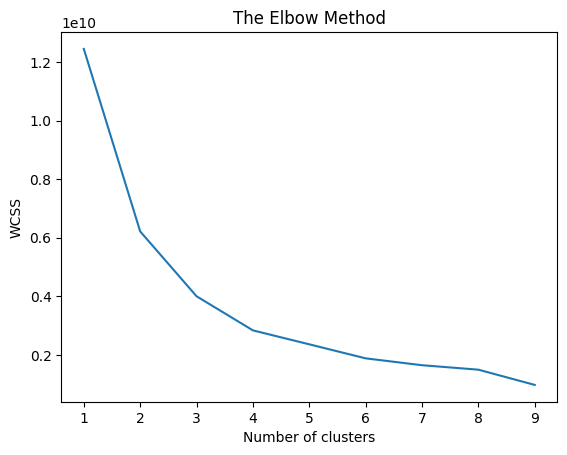

In [12]:
import matplotlib.pyplot as plt
plt.plot(n_clusters, costs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1085, ncost: 3626898804.0031075
Run: 1, iteration: 2/20, moves: 342, ncost: 3469349509.948041
Run: 1, iteration: 3/20, moves: 171, ncost: 3427022788.1141987
Run: 1, iteration: 4/20, moves: 133, ncost: 3371797930.54513
Run: 1, iteration: 5/20, moves: 172, ncost: 3284217011.685374
Run: 1, iteration: 6/20, moves: 162, ncost: 3214061124.8206897
Run: 1, iteration: 7/20, moves: 82, ncost: 3193592339.6348524
Run: 1, iteration: 8/20, moves: 32, ncost: 3191673708.7530913
Run: 1, iteration: 9/20, moves: 28, ncost: 3181025529.887562
Run: 1, iteration: 10/20, moves: 33, ncost: 3177541421.056739
Run: 1, iteration: 11/20, moves: 28, ncost: 3175114266.1641626
Run: 1, iteration: 12/20, moves: 20, ncost: 3171528838.4131765
Run: 1, iteration: 13/20, moves: 23, nc

In [57]:
print(kproto.cluster_centroids_)

[['168.0' '169.12280701754386' '89.35087719298245' '169.7719298245614'
  '26.45614035087719' '347.0175438596491' '7104.7192982456145'
  '2997.280701754386' 'MAHARASHTRA' 'BANGALORE COMMR.' '2010']
 ['78.11775585696671' '73.134401972873' '50.20098643649815'
  '80.92108508014796' '10.590012330456227' '59.36868064118372'
  '974.8921085080148' '1115.8076448828606' 'ANDHRA PRADESH' 'ADILABAD'
  '2012']
 ['38.48800231280717' '32.33781439722463' '22.061000289100896'
  '31.21220005782018' '5.886672448684591' '19.108268285631684'
  '218.89071986123156' '201.0972824515756' 'UTTAR PRADESH' 'G.R.P.'
  '2012']]


In [58]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [59]:
ss['cluster'] = list(clusters)

In [66]:
ss.loc[ss['cluster'] == 1].describe()

,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
count,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.000000,1622.0
mean,2006.781134,78.117756,73.134402,50.200986,80.921085,10.590012,59.368681,974.892109,1115.807645,1.0
std,3.487645,52.145413,71.595050,43.367975,91.054268,13.702811,69.192627,808.312487,705.169525,0.0
min,2001.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.000000,0.000000,1.0
25%,2004.000000,43.000000,34.000000,25.000000,26.000000,2.250000,23.000000,392.000000,673.000000,1.0
50%,2007.000000,68.000000,56.000000,41.000000,49.000000,6.000000,42.000000,686.500000,1041.000000,1.0
75%,2010.000000,99.000000,89.000000,62.000000,93.750000,14.000000,72.750000,1290.750000,1408.000000,1.0
max,2012.000000,542.000000,741.000000,568.000000,587.000000,219.000000,757.000000,4377.000000,4728.000000,1.0


In [61]:
import joblib

joblib.dump(kproto, 'kproto.pkl')
clus = joblib.load('kproto.pkl')

In [62]:
ss.head()
ss.to_csv("F:\\Final Year Project\\Datasets\\classfication_data_with_cluster_labels.csv")

In [78]:
features = [['ANDHRA PRADESH','ADILABAD',2025,346,	310,	291,	953,	37,	511,	425,	912]]
features = pd.DataFrame(features)
features = features.values
y_pred = clus.predict(features, categorical=[0,1,2])
if y_pred[0] == 0:         
    label="High Crime Rate Area"
elif y_pred[0] == 1:
    label="Moderate Crime Rate Area"
elif y_pred[0] == 2:
    label = "Low Crime Rate Area"
print(label)

Moderate Crime Rate Area


### Random Forest Classification (Using cluster labels from K-Prototype model)

In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\classfication_data_with_cluster_labels.csv")
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50,46,9,41,199,1131,1
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23,53,8,16,366,1543,1
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27,59,4,14,723,2088,1
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20,25,1,4,173,795,2
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23,49,4,25,1021,1244,1


In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["STATE/UT"]=le.fit_transform(df["STATE/UT"].astype("str"))
df["STATE/UT"].value_counts()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["DISTRICT"]=le.fit_transform(df["DISTRICT"].astype("str"))
df["DISTRICT"].value_counts()

239    46
705    37
546    37
799    36
603    35
       ..
506     1
685     1
2       1
408     1
83      1
Name: DISTRICT, Length: 806, dtype: int64

In [71]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,THEFT,HURT/GREVIOUS HURT,cluster
0,1,3,2001,101,60,50,46,9,41,199,1131,1
1,1,28,2001,151,125,23,53,8,16,366,1543,1
2,1,154,2001,101,57,27,59,4,14,723,2088,1
3,1,172,2001,80,53,20,25,1,4,173,795,2
4,1,219,2001,82,67,23,49,4,25,1021,1244,1


In [72]:
X = df.iloc[:,:11]
Y = df.iloc[:,df.columns=='cluster']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [74]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

y_pred = random_forest.predict(X_test)
print(y_pred)

C:\Users\Md Mubeen Ali Zaki\AppData\Local\Temp\ipykernel_9372\1817316301.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,Y_train)


[2 2 2 ... 1 1 2]


In [75]:
from sklearn.metrics import accuracy_score,classification_report

acc = accuracy_score(y_pred,Y_test)
print(acc)

clf = classification_report(y_pred,Y_test)
print(clf)

0.9930232558139535
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.98      0.98      0.98       311
           2       1.00      1.00      1.00      1399

    accuracy                           0.99      1720
   macro avg       0.92      0.99      0.95      1720
weighted avg       0.99      0.99      0.99      1720



In [76]:
import joblib

joblib.dump(random_forest, 'cls.pkl')
cls = joblib.load('cls.pkl')

In [80]:
features = [[1,1,2025,346,	310,	291,	953,	37,	511,	4025,	3912]]
features = pd.DataFrame(features)
y_pred = cls.predict(features)
if y_pred[0] == 0:         
    label="High Crime Rate Area"
elif y_pred[0] == 1:
    label="Moderate Crime Rate Area"
elif y_pred[0] == 2:
    label = "Low Crime Rate Area"
print(label)

High Crime Rate Area


### Linear Regression on crime rate (1981-2021)

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('F:\\Final Year Project\\Datasets\\CRIME_RATE(81-21).csv')
df

,Year,Total IPC,Crime rate(IPC per 100k)
0,1981,1385757,200.8
1,1982,1353904,192.0
2,1983,1349866,187.4
3,1984,1358660,184.7
4,1985,1384731,184.4
5,1986,1405835,183.5
6,1987,1406992,180.1
7,1988,1440356,180.8
8,1989,1529844,188.5
9,1990,1604449,194.0


In [4]:
df1 = df.drop(['Crime rate(IPC per 100k)'], axis=1)
df2 = df.drop(['Total IPC'], axis=1)
df1.head()

,Year,Total IPC
0,1981,1385757
1,1982,1353904
2,1983,1349866
3,1984,1358660
4,1985,1384731


In [12]:
plot = px.line(df1, x="Year", y="Total IPC", labels={'x':'Year','value':'IPC Cases Reported','variable':'Total IPC Crimes Reported'}, title="Total IPC Crimes Reported in India from 1981 to 2021", markers=True)
plot.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', dtick=5)
plot.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson')
plot.update_layout(font_family="Roboto",font_color="black",title_font_family="Arial Black",title_font_color="black",legend_title_font_color="black")
#plot.show()
plot.write_html('IPC_linear.html')

In [13]:
plot = px.line(df2, x="Year", y="Crime rate(IPC per 100k)", labels={'x':'Year','value':'Crime rate(IPC per 100k)','variable':'Crime Rate (Total IPC crimes per 100k population)'}, title="Crime Rate(Total IPC Crime per 100k population) in India from 1981 to 2021", markers=True)
plot.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', dtick=5)
plot.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson')
plot.update_layout(font_family="Roboto",font_color="black",title_font_family="Arial Black",title_font_color="black",legend_title_font_color="black")
#plot.show()
plot.write_html('crimerate_linear.html')

In [88]:
X = df.iloc[:,0]
Y = df.iloc[:,df.columns=='Crime rate(IPC per 100k)']
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [19]:
# x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [89]:
linreg=LinearRegression()
linreg.fit(X,Y)

LinearRegression()

In [90]:
y_pred=linreg.predict(X)
print(y_pred)

[[166.9641115 ]
 [168.43419861]
 [169.90428571]
 [171.37437282]
 [172.84445993]
 [174.31454704]
 [175.78463415]
 [177.25472125]
 [178.72480836]
 [180.19489547]
 [181.66498258]
 [183.13506969]
 [184.60515679]
 [186.0752439 ]
 [187.54533101]
 [189.01541812]
 [190.48550523]
 [191.95559233]
 [193.42567944]
 [194.89576655]
 [196.36585366]
 [197.83594077]
 [199.30602787]
 [200.77611498]
 [202.24620209]
 [203.7162892 ]
 [205.18637631]
 [206.65646341]
 [208.12655052]
 [209.59663763]
 [211.06672474]
 [212.53681185]
 [214.00689895]
 [215.47698606]
 [216.94707317]
 [218.41716028]
 [219.88724739]
 [221.35733449]
 [222.8274216 ]
 [224.29750871]
 [225.76759582]]


In [91]:
Accuracy=r2_score(Y,y_pred)*100
print(Accuracy)

32.9158048243261


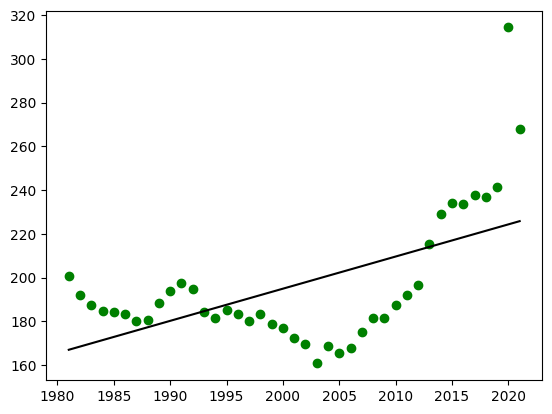

In [92]:
plt.scatter(X,Y,color='g') 
plt.plot(X, y_pred,color='k') 
plt.show()

In [93]:
import joblib

joblib.dump(linreg, 'crimerate(LR).pkl')
le = joblib.load('crimerate(LR).pkl')

In [94]:
test = pd.DataFrame([2021])
y_pred = le.predict(test)
print(y_pred)

[[225.76759582]]


In [95]:
X = df.iloc[:,0]
Y = df.iloc[:,df.columns=='Total IPC']
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [96]:
linreg=LinearRegression()
linreg.fit(X,Y)

LinearRegression()

In [97]:
y_pred=linreg.predict(X)
print(y_pred)

[[1008756.63763066]
 [1060753.95087108]
 [1112751.2641115 ]
 [1164748.57735191]
 [1216745.89059234]
 [1268743.20383276]
 [1320740.51707317]
 [1372737.83031359]
 [1424735.143554  ]
 [1476732.45679443]
 [1528729.77003485]
 [1580727.08327526]
 [1632724.39651568]
 [1684721.70975609]
 [1736719.02299652]
 [1788716.33623694]
 [1840713.64947735]
 [1892710.96271777]
 [1944708.2759582 ]
 [1996705.5891986 ]
 [2048702.90243903]
 [2100700.21567944]
 [2152697.52891986]
 [2204694.84216028]
 [2256692.15540069]
 [2308689.46864112]
 [2360686.78188154]
 [2412684.09512195]
 [2464681.40836237]
 [2516678.72160278]
 [2568676.03484321]
 [2620673.34808363]
 [2672670.66132404]
 [2724667.97456446]
 [2776665.28780489]
 [2828662.6010453 ]
 [2880659.91428572]
 [2932657.22752613]
 [2984654.54076655]
 [3036651.85400698]
 [3088649.16724738]]


In [98]:
Accuracy=r2_score(Y,y_pred)*100
print(Accuracy)

79.44046493400015


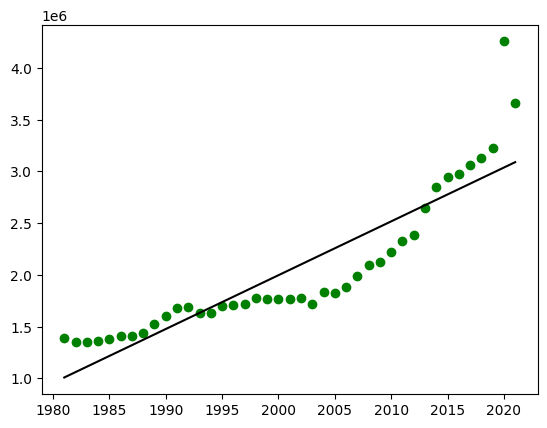

In [99]:
plt.scatter(X,Y,color='g') 
plt.plot(X, y_pred,color='k') 
plt.show()

In [100]:
import joblib

joblib.dump(linreg, 'IPC(LR).pkl')
le = joblib.load('IPC(LR).pkl')

In [101]:
test = pd.DataFrame([2021])
y_pred = le.predict(test)
print(y_pred)

[[3088649.16724738]]


# Time Series Forecasting :

## fbprophet :

### For crime rate:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [21]:
#df = pd.read_csv("F:\\Final Year Project\\Datasets\\actualdata2.csv")
#df = df[['ds','y']]

In [2]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\CRIME_RATE(81-21).csv")
df = df[['Crime rate(IPC per 100k)']]
y = df.values

In [3]:
from datetime import datetime

In [4]:
ds = pd.date_range(start='1/1/1981', end='1/1/2022', freq='Y')

In [5]:
ds = np.array(ds).reshape(-2,1)

In [6]:
df['ds'] = pd.DataFrame(ds)

In [7]:
df['y'] = pd.DataFrame(y)

In [8]:
df = df.drop(['Crime rate(IPC per 100k)'],axis=1)

In [9]:
df

,ds,y
0,1981-12-31,200.8
1,1982-12-31,192.0
2,1983-12-31,187.4
3,1984-12-31,184.7
4,1985-12-31,184.4
5,1986-12-31,183.5
6,1987-12-31,180.1
7,1988-12-31,180.8
8,1989-12-31,188.5
9,1990-12-31,194.0


In [10]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

f:\Programs\Python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
m = Prophet()
m.fit(df)

18:13:54 - cmdstanpy - INFO - Chain [1] start processing
18:13:54 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=5, freq='Y')

In [13]:
forecast = m.predict(future)

In [14]:
forecast_ouptut=forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]

In [20]:
y_pred = forecast_ouptut['yhat'].head(41)
Y = df['y']

In [21]:
Accuracy = r2_score(Y,y_pred)*100
print(Accuracy)

88.85251460155811


In [27]:
plot1 = plot_plotly(m, forecast)

In [29]:
plot1.write_html('forecast.html')

In [30]:
plot2 = plot_components_plotly(m, forecast)
plot2.write_html('forecast_cmp.html')

### For total ipc crimes:

In [22]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\CRIME_RATE(81-21).csv")
df = df[['Total IPC']]
y = df.values

In [23]:
from datetime import datetime

In [24]:
ds = pd.date_range(start='1/1/1981', end='1/1/2022', freq='Y')
ds = np.array(ds).reshape(-2,1)
df['ds'] = pd.DataFrame(ds)
df['y'] = pd.DataFrame(y)
df = df.drop(['Total IPC'],axis=1)
df

,ds,y
0,1981-12-31,1385757
1,1982-12-31,1353904
2,1983-12-31,1349866
3,1984-12-31,1358660
4,1985-12-31,1384731
5,1986-12-31,1405835
6,1987-12-31,1406992
7,1988-12-31,1440356
8,1989-12-31,1529844
9,1990-12-31,1604449


In [25]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [26]:
m = Prophet()
m.fit(df)

18:33:17 - cmdstanpy - INFO - Chain [1] start processing
18:33:18 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=5, freq='Y')
forecast = m.predict(future)
forecast_ouptut=forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]

In [8]:
plot1 = plot_plotly(m, forecast)

In [9]:
plot1.write_html('forecast(total_ipc).html')

In [10]:
plot2 = plot_components_plotly(m, forecast)
plot2.write_html('forecast_cmp_total_ipc.html')

In [28]:
y_pred = forecast_ouptut['yhat'].head(41)
Y = df['y']
Accuracy = r2_score(Y,y_pred)*100
print(Accuracy)

96.66452019469203


# Indian crime rate based on socio-economic factors:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("F:\\Final Year Project\\Datasets\\india-crime-socio-economic-factors.csv")
df.head()

,date,Unemployment Rate (%),Population(in cr),Literacy rate,GDP(per capita),Crime rate(total ipc per 100k)
0,31-12-1991,5.599,88.89,48.22,303.850438,197.5
1,31-12-1992,5.727,90.76,48.22,317.559136,194.7
2,31-12-1993,5.691,92.64,48.22,301.501195,184.4
3,31-12-1994,5.739,94.53,48.22,346.227393,181.7
4,31-12-1995,5.755,96.43,48.22,373.628280,185.1


In [4]:
X = df.iloc[:,1:5]
Y = df.iloc[:,5:6]
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [5]:
linreg=LinearRegression()
linreg.fit(X,Y)

LinearRegression()

In [6]:
y_pred=linreg.predict(X)
print(y_pred)

[[188.86850018]
 [191.06595797]
 [185.0415531 ]
 [187.33786553]
 [186.96934341]
 [185.42930731]
 [179.16771497]
 [177.31613375]
 [178.83622385]
 [169.65273499]
 [161.43017523]
 [158.15959139]
 [165.35001861]
 [168.79494683]
 [172.83799385]
 [176.7548642 ]
 [192.74125982]
 [181.75056428]
 [192.45954773]
 [212.56238206]
 [211.4308549 ]
 [206.61170571]
 [204.33072491]
 [212.92170947]
 [212.85463105]
 [220.90318921]
 [238.09038857]
 [233.61147293]
 [238.16053141]
 [310.81256075]
 [272.54555204]]


In [7]:
Accuracy=r2_score(Y,y_pred)*100
print(Accuracy)

91.17740523172617


In [8]:
test = pd.DataFrame([[5.98,140.76,77.77,2256.59]])
y_pred = linreg.predict(test)
print(y_pred)

[[272.56202112]]


In [9]:
import pandas as pd
import numpy as np

df = df.iloc[:,1:]
corr = df.corr()
plt = corr.style.background_gradient(cmap='coolwarm')
plt

,Unemployment Rate (%),Population(in cr),Literacy rate,GDP(per capita),Crime rate(total ipc per 100k)
Unemployment Rate (%),1.000000,0.071694,0.135227,0.082217,0.505860
Population(in cr),0.071694,1.000000,0.955363,0.955806,0.676903
Literacy rate,0.135227,0.955363,1.000000,0.909916,0.659457
GDP(per capita),0.082217,0.955806,0.909916,1.000000,0.797719
Crime rate(total ipc per 100k),0.505860,0.676903,0.659457,0.797719,1.000000


<AxesSubplot: >

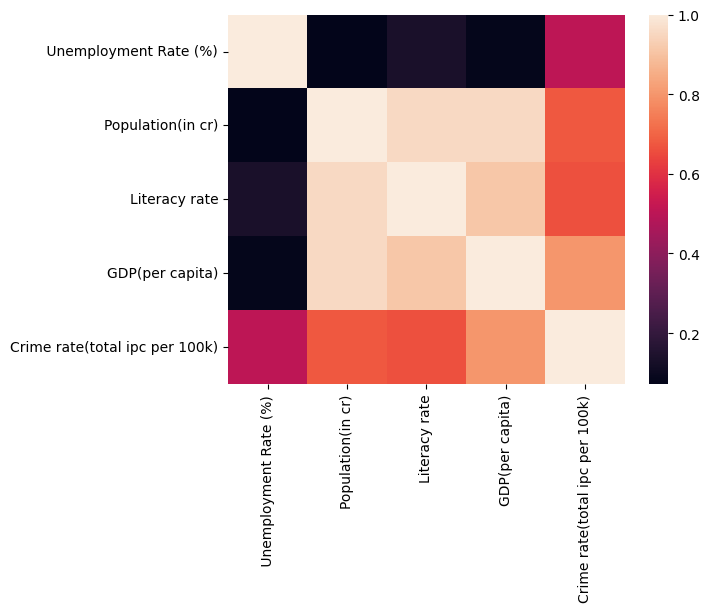

In [10]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [11]:
import joblib

joblib.dump(linreg, 'crime_factors.pkl')
le = joblib.load('crime_factors.pkl')